In [1]:
import torch
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.3]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [2]:
def model(t_u, w , b):
    return t_u*w+b

In [3]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
    

In [31]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.3000])

In [32]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.0238)

In [33]:
delta = 0.1
loss_ratew = (loss_fn(model(t_u, w+ delta,b),t_c) - loss_fn(model(t_u,w-delta,b),t_c)) / (2.0*delta)
loss_ratew

tensor(4515.1938)

In [34]:
learning_rate = 1e-2
w = w - learning_rate * loss_ratew
b

tensor(0.)

In [35]:
delta = 0.1
loss_rateb = (loss_fn(model(t_u, w,b+ delta),t_c) - loss_fn(model(t_u,w,b-delta),t_c)) / (2.0*delta)
b = b - learning_rate * loss_rateb

In [63]:
def dloss_fn(t_p, t_c):
    dsq = 2* (t_p - t_c)
    return dsq / t_p.size(0)

In [45]:
def model_dw(t_u, w, b):
    return t_u
def model_db(t_u, w, b):
    return 1.0

In [67]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dp =  dloss_fn(t_p, t_c)
    dloss_dw = model_dw(t_u,w,b) * dloss_dp
    dloss_db = model_db(t_u,w,b) * dloss_dp
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [79]:
def training(n_epochs, learning_rate, params, t_u, t_c, print_params = True):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d: Loss %f'%(epoch, float(loss)))
        if (print_params):
            print('\tParams: ', params)
            print("\tGrad:", grad)
    return params

In [80]:
training(n_epochs= 100,learning_rate = 1e-4, params = torch.tensor([1.0,0.0]),t_u = t_u, t_c = t_c)

Epoch 1: Loss 1763.023804
	Params:  tensor([ 0.5485, -0.0083])
	Grad: tensor([4515.1929,   82.5818])
Epoch 2: Loss 323.317596
	Params:  tensor([ 0.3625, -0.0118])
	Grad: tensor([1859.8057,   35.7961])
Epoch 3: Loss 79.046379
	Params:  tensor([ 0.2859, -0.0135])
	Grad: tensor([766.0346,  16.5248])
Epoch 4: Loss 37.600857
	Params:  tensor([ 0.2543, -0.0143])
	Grad: tensor([315.5030,   8.5867])
Epoch 5: Loss 30.568178
	Params:  tensor([ 0.2414, -0.0149])
	Grad: tensor([129.9265,   5.3170])
Epoch 6: Loss 29.374207
	Params:  tensor([ 0.2360, -0.0153])
	Grad: tensor([53.4861,  3.9701])
Epoch 7: Loss 29.170866
	Params:  tensor([ 0.2338, -0.0156])
	Grad: tensor([21.9999,  3.4153])
Epoch 8: Loss 29.135601
	Params:  tensor([ 0.2329, -0.0159])
	Grad: tensor([9.0306, 3.1867])
Epoch 9: Loss 29.128859
	Params:  tensor([ 0.2325, -0.0162])
	Grad: tensor([3.6884, 3.0926])
Epoch 10: Loss 29.126953
	Params:  tensor([ 0.2324, -0.0166])
	Grad: tensor([1.4880, 3.0537])
Epoch 11: Loss 29.125868
	Params:  ten

Epoch 100: Loss 29.044416
	Params:  tensor([ 0.2328, -0.0438])
	Grad: tensor([-0.0532,  3.0218])


tensor([ 0.2328, -0.0438])

In [81]:
t_un = t_u * 0.1

In [83]:
training(n_epochs= 100,learning_rate = 1e-2, params = torch.tensor([1.0,0.0]),t_u = t_un, t_c = t_c)

Epoch 1: Loss 80.390091
	Params:  tensor([1.7760, 0.1064])
	Grad: tensor([-77.6007, -10.6418])
Epoch 2: Loss 37.607246
	Params:  tensor([2.0848, 0.1303])
	Grad: tensor([-30.8761,  -2.3910])
Epoch 3: Loss 30.896172
	Params:  tensor([2.2095, 0.1218])
	Grad: tensor([-12.4760,   0.8551])
Epoch 4: Loss 29.778913
	Params:  tensor([2.2618, 0.1005])
	Grad: tensor([-5.2298,  2.1303])
Epoch 5: Loss 29.529335
	Params:  tensor([2.2856, 0.0742])
	Grad: tensor([-2.3758,  2.6294])
Epoch 6: Loss 29.414576
	Params:  tensor([2.2981, 0.0460])
	Grad: tensor([-1.2514,  2.8229])
Epoch 7: Loss 29.320971
	Params:  tensor([2.3062, 0.0170])
	Grad: tensor([-0.8081,  2.8960])
Epoch 8: Loss 29.230902
	Params:  tensor([ 2.3125, -0.0122])
	Grad: tensor([-0.6330,  2.9218])
Epoch 9: Loss 29.141640
	Params:  tensor([ 2.3181, -0.0415])
	Grad: tensor([-0.5635,  2.9289])
Epoch 10: Loss 29.052763
	Params:  tensor([ 2.3235, -0.0708])
	Grad: tensor([-0.5356,  2.9287])
Epoch 11: Loss 28.964195
	Params:  tensor([ 2.3287, -0.10

	Params:  tensor([ 2.7333, -2.3893])
	Grad: tensor([-0.4484,  2.5376])
Epoch 96: Loss 22.436895
	Params:  tensor([ 2.7378, -2.4146])
	Grad: tensor([-0.4476,  2.5333])
Epoch 97: Loss 22.370773
	Params:  tensor([ 2.7422, -2.4399])
	Grad: tensor([-0.4469,  2.5290])
Epoch 98: Loss 22.304873
	Params:  tensor([ 2.7467, -2.4652])
	Grad: tensor([-0.4461,  2.5247])
Epoch 99: Loss 22.239199
	Params:  tensor([ 2.7511, -2.4904])
	Grad: tensor([-0.4453,  2.5204])
Epoch 100: Loss 22.173746
	Params:  tensor([ 2.7556, -2.5155])
	Grad: tensor([-0.4446,  2.5161])


tensor([ 2.7556, -2.5155])

In [89]:
params = training(n_epochs= 5000,learning_rate = 1e-2, params = torch.tensor([1.0,0.0]),t_u = t_un, t_c = t_c)

Epoch 1: Loss 80.390091
	Params:  tensor([1.7760, 0.1064])
	Grad: tensor([-77.6007, -10.6418])
Epoch 2: Loss 37.607246
	Params:  tensor([2.0848, 0.1303])
	Grad: tensor([-30.8761,  -2.3910])
Epoch 3: Loss 30.896172
	Params:  tensor([2.2095, 0.1218])
	Grad: tensor([-12.4760,   0.8551])
Epoch 4: Loss 29.778913
	Params:  tensor([2.2618, 0.1005])
	Grad: tensor([-5.2298,  2.1303])
Epoch 5: Loss 29.529335
	Params:  tensor([2.2856, 0.0742])
	Grad: tensor([-2.3758,  2.6294])
Epoch 6: Loss 29.414576
	Params:  tensor([2.2981, 0.0460])
	Grad: tensor([-1.2514,  2.8229])
Epoch 7: Loss 29.320971
	Params:  tensor([2.3062, 0.0170])
	Grad: tensor([-0.8081,  2.8960])
Epoch 8: Loss 29.230902
	Params:  tensor([ 2.3125, -0.0122])
	Grad: tensor([-0.6330,  2.9218])
Epoch 9: Loss 29.141640
	Params:  tensor([ 2.3181, -0.0415])
	Grad: tensor([-0.5635,  2.9289])
Epoch 10: Loss 29.052763
	Params:  tensor([ 2.3235, -0.0708])
	Grad: tensor([-0.5356,  2.9287])
Epoch 11: Loss 28.964195
	Params:  tensor([ 2.3287, -0.10

	Params:  tensor([ 2.7333, -2.3893])
	Grad: tensor([-0.4484,  2.5376])
Epoch 96: Loss 22.436895
	Params:  tensor([ 2.7378, -2.4146])
	Grad: tensor([-0.4476,  2.5333])
Epoch 97: Loss 22.370773
	Params:  tensor([ 2.7422, -2.4399])
	Grad: tensor([-0.4469,  2.5290])
Epoch 98: Loss 22.304873
	Params:  tensor([ 2.7467, -2.4652])
	Grad: tensor([-0.4461,  2.5247])
Epoch 99: Loss 22.239199
	Params:  tensor([ 2.7511, -2.4904])
	Grad: tensor([-0.4453,  2.5204])
Epoch 100: Loss 22.173746
	Params:  tensor([ 2.7556, -2.5155])
	Grad: tensor([-0.4446,  2.5161])
Epoch 101: Loss 22.108515
	Params:  tensor([ 2.7600, -2.5406])
	Grad: tensor([-0.4438,  2.5119])
Epoch 102: Loss 22.043505
	Params:  tensor([ 2.7645, -2.5657])
	Grad: tensor([-0.4431,  2.5076])
Epoch 103: Loss 21.978716
	Params:  tensor([ 2.7689, -2.5907])
	Grad: tensor([-0.4423,  2.5033])
Epoch 104: Loss 21.914152
	Params:  tensor([ 2.7733, -2.6157])
	Grad: tensor([-0.4416,  2.4991])
Epoch 105: Loss 21.849798
	Params:  tensor([ 2.7777, -2.6407

Epoch 196: Loss 16.821306
	Params:  tensor([ 3.1491, -4.7424])
	Grad: tensor([-0.3777,  2.1375])
Epoch 197: Loss 16.774233
	Params:  tensor([ 3.1528, -4.7638])
	Grad: tensor([-0.3770,  2.1339])
Epoch 198: Loss 16.727318
	Params:  tensor([ 3.1566, -4.7851])
	Grad: tensor([-0.3764,  2.1302])
Epoch 199: Loss 16.680561
	Params:  tensor([ 3.1604, -4.8063])
	Grad: tensor([-0.3758,  2.1266])
Epoch 200: Loss 16.633965
	Params:  tensor([ 3.1641, -4.8276])
	Grad: tensor([-0.3751,  2.1230])
Epoch 201: Loss 16.587526
	Params:  tensor([ 3.1679, -4.8488])
	Grad: tensor([-0.3745,  2.1194])
Epoch 202: Loss 16.541246
	Params:  tensor([ 3.1716, -4.8699])
	Grad: tensor([-0.3738,  2.1158])
Epoch 203: Loss 16.495117
	Params:  tensor([ 3.1753, -4.8910])
	Grad: tensor([-0.3732,  2.1122])
Epoch 204: Loss 16.449150
	Params:  tensor([ 3.1791, -4.9121])
	Grad: tensor([-0.3726,  2.1086])
Epoch 205: Loss 16.403339
	Params:  tensor([ 3.1828, -4.9332])
	Grad: tensor([-0.3720,  2.1050])
Epoch 206: Loss 16.357679
	Par

Epoch 292: Loss 12.958630
	Params:  tensor([ 3.4833, -6.6342])
	Grad: tensor([-0.3209,  1.8158])
Epoch 293: Loss 12.924656
	Params:  tensor([ 3.4865, -6.6523])
	Grad: tensor([-0.3203,  1.8127])
Epoch 294: Loss 12.890799
	Params:  tensor([ 3.4897, -6.6704])
	Grad: tensor([-0.3198,  1.8097])
Epoch 295: Loss 12.857059
	Params:  tensor([ 3.4929, -6.6885])
	Grad: tensor([-0.3192,  1.8066])
Epoch 296: Loss 12.823432
	Params:  tensor([ 3.4961, -6.7065])
	Grad: tensor([-0.3187,  1.8035])
Epoch 297: Loss 12.789917
	Params:  tensor([ 3.4993, -6.7245])
	Grad: tensor([-0.3181,  1.8005])
Epoch 298: Loss 12.756518
	Params:  tensor([ 3.5025, -6.7425])
	Grad: tensor([-0.3176,  1.7974])
Epoch 299: Loss 12.723229
	Params:  tensor([ 3.5057, -6.7604])
	Grad: tensor([-0.3171,  1.7943])
Epoch 300: Loss 12.690054
	Params:  tensor([ 3.5088, -6.7784])
	Grad: tensor([-0.3165,  1.7913])
Epoch 301: Loss 12.656997
	Params:  tensor([ 3.5120, -6.7962])
	Grad: tensor([-0.3160,  1.7883])
Epoch 302: Loss 12.624047
	Par

	Params:  tensor([ 3.7564, -8.1794])
	Grad: tensor([-0.2744,  1.5531])
Epoch 385: Loss 10.245110
	Params:  tensor([ 3.7591, -8.1949])
	Grad: tensor([-0.2740,  1.5504])
Epoch 386: Loss 10.220344
	Params:  tensor([ 3.7619, -8.2104])
	Grad: tensor([-0.2735,  1.5478])
Epoch 387: Loss 10.195659
	Params:  tensor([ 3.7646, -8.2259])
	Grad: tensor([-0.2730,  1.5452])
Epoch 388: Loss 10.171060
	Params:  tensor([ 3.7673, -8.2413])
	Grad: tensor([-0.2726,  1.5426])
Epoch 389: Loss 10.146544
	Params:  tensor([ 3.7700, -8.2567])
	Grad: tensor([-0.2721,  1.5399])
Epoch 390: Loss 10.122108
	Params:  tensor([ 3.7727, -8.2721])
	Grad: tensor([-0.2716,  1.5373])
Epoch 391: Loss 10.097759
	Params:  tensor([ 3.7755, -8.2874])
	Grad: tensor([-0.2712,  1.5347])
Epoch 392: Loss 10.073490
	Params:  tensor([ 3.7782, -8.3027])
	Grad: tensor([-0.2707,  1.5321])
Epoch 393: Loss 10.049307
	Params:  tensor([ 3.7809, -8.3180])
	Grad: tensor([-0.2703,  1.5295])
Epoch 394: Loss 10.025204
	Params:  tensor([ 3.7836, -8.

	Params:  tensor([ 3.9876, -9.4878])
	Grad: tensor([-0.2351,  1.3306])
Epoch 476: Loss 8.303093
	Params:  tensor([ 3.9899, -9.5011])
	Grad: tensor([-0.2347,  1.3283])
Epoch 477: Loss 8.284908
	Params:  tensor([ 3.9923, -9.5143])
	Grad: tensor([-0.2343,  1.3261])
Epoch 478: Loss 8.266789
	Params:  tensor([ 3.9946, -9.5276])
	Grad: tensor([-0.2339,  1.3238])
Epoch 479: Loss 8.248734
	Params:  tensor([ 3.9969, -9.5408])
	Grad: tensor([-0.2335,  1.3216])
Epoch 480: Loss 8.230738
	Params:  tensor([ 3.9993, -9.5540])
	Grad: tensor([-0.2331,  1.3193])
Epoch 481: Loss 8.212808
	Params:  tensor([ 4.0016, -9.5671])
	Grad: tensor([-0.2327,  1.3171])
Epoch 482: Loss 8.194930
	Params:  tensor([ 4.0039, -9.5803])
	Grad: tensor([-0.2323,  1.3149])
Epoch 483: Loss 8.177115
	Params:  tensor([ 4.0062, -9.5934])
	Grad: tensor([-0.2319,  1.3126])
Epoch 484: Loss 8.159366
	Params:  tensor([ 4.0085, -9.6065])
	Grad: tensor([-0.2315,  1.3104])
Epoch 485: Loss 8.141667
	Params:  tensor([ 4.0109, -9.6196])
	Gr

	Grad: tensor([-0.2032,  1.1497])
Epoch 562: Loss 6.944995
	Params:  tensor([  4.1775, -10.5630])
	Grad: tensor([-0.2028,  1.1478])
Epoch 563: Loss 6.931421
	Params:  tensor([  4.1796, -10.5745])
	Grad: tensor([-0.2025,  1.1458])
Epoch 564: Loss 6.917893
	Params:  tensor([  4.1816, -10.5859])
	Grad: tensor([-0.2021,  1.1439])
Epoch 565: Loss 6.904411
	Params:  tensor([  4.1836, -10.5973])
	Grad: tensor([-0.2018,  1.1419])
Epoch 566: Loss 6.890976
	Params:  tensor([  4.1856, -10.6087])
	Grad: tensor([-0.2014,  1.1400])
Epoch 567: Loss 6.877582
	Params:  tensor([  4.1876, -10.6201])
	Grad: tensor([-0.2011,  1.1381])
Epoch 568: Loss 6.864238
	Params:  tensor([  4.1896, -10.6315])
	Grad: tensor([-0.2008,  1.1361])
Epoch 569: Loss 6.850938
	Params:  tensor([  4.1916, -10.6428])
	Grad: tensor([-0.2004,  1.1342])
Epoch 570: Loss 6.837682
	Params:  tensor([  4.1937, -10.6541])
	Grad: tensor([-0.2001,  1.1323])
Epoch 571: Loss 6.824477
	Params:  tensor([  4.1956, -10.6654])
	Grad: tensor([-0.19

Epoch 651: Loss 5.900726
	Params:  tensor([  4.3449, -11.5102])
	Grad: tensor([-0.1744,  0.9867])
Epoch 652: Loss 5.890694
	Params:  tensor([  4.3467, -11.5201])
	Grad: tensor([-0.1740,  0.9850])
Epoch 653: Loss 5.880697
	Params:  tensor([  4.3484, -11.5299])
	Grad: tensor([-0.1737,  0.9834])
Epoch 654: Loss 5.870733
	Params:  tensor([  4.3501, -11.5397])
	Grad: tensor([-0.1734,  0.9817])
Epoch 655: Loss 5.860804
	Params:  tensor([  4.3519, -11.5495])
	Grad: tensor([-0.1732,  0.9800])
Epoch 656: Loss 5.850906
	Params:  tensor([  4.3536, -11.5593])
	Grad: tensor([-0.1729,  0.9784])
Epoch 657: Loss 5.841044
	Params:  tensor([  4.3553, -11.5691])
	Grad: tensor([-0.1726,  0.9767])
Epoch 658: Loss 5.831215
	Params:  tensor([  4.3570, -11.5788])
	Grad: tensor([-0.1723,  0.9750])
Epoch 659: Loss 5.821424
	Params:  tensor([  4.3588, -11.5886])
	Grad: tensor([-0.1720,  0.9734])
Epoch 660: Loss 5.811657
	Params:  tensor([  4.3605, -11.5983])
	Grad: tensor([-0.1717,  0.9717])
Epoch 661: Loss 5.80

	Params:  tensor([  4.5037, -12.4086])
	Grad: tensor([-0.1474,  0.8340])
Epoch 751: Loss 5.048790
	Params:  tensor([  4.5051, -12.4169])
	Grad: tensor([-0.1471,  0.8325])
Epoch 752: Loss 5.041649
	Params:  tensor([  4.5066, -12.4252])
	Grad: tensor([-0.1469,  0.8311])
Epoch 753: Loss 5.034533
	Params:  tensor([  4.5081, -12.4335])
	Grad: tensor([-0.1466,  0.8297])
Epoch 754: Loss 5.027439
	Params:  tensor([  4.5095, -12.4418])
	Grad: tensor([-0.1464,  0.8283])
Epoch 755: Loss 5.020370
	Params:  tensor([  4.5110, -12.4501])
	Grad: tensor([-0.1461,  0.8269])
Epoch 756: Loss 5.013325
	Params:  tensor([  4.5124, -12.4583])
	Grad: tensor([-0.1459,  0.8255])
Epoch 757: Loss 5.006302
	Params:  tensor([  4.5139, -12.4666])
	Grad: tensor([-0.1456,  0.8241])
Epoch 758: Loss 4.999305
	Params:  tensor([  4.5154, -12.4748])
	Grad: tensor([-0.1454,  0.8227])
Epoch 759: Loss 4.992331
	Params:  tensor([  4.5168, -12.4830])
	Grad: tensor([-0.1451,  0.8213])
Epoch 760: Loss 4.985382
	Params:  tensor([  

	Params:  tensor([  4.6378, -13.1679])
	Grad: tensor([-0.1245,  0.7049])
Epoch 850: Loss 4.447379
	Params:  tensor([  4.6391, -13.1749])
	Grad: tensor([-0.1243,  0.7037])
Epoch 851: Loss 4.442276
	Params:  tensor([  4.6403, -13.1819])
	Grad: tensor([-0.1241,  0.7025])
Epoch 852: Loss 4.437191
	Params:  tensor([  4.6415, -13.1889])
	Grad: tensor([-0.1239,  0.7013])
Epoch 853: Loss 4.432123
	Params:  tensor([  4.6428, -13.1959])
	Grad: tensor([-0.1237,  0.7001])
Epoch 854: Loss 4.427075
	Params:  tensor([  4.6440, -13.2029])
	Grad: tensor([-0.1235,  0.6989])
Epoch 855: Loss 4.422042
	Params:  tensor([  4.6452, -13.2099])
	Grad: tensor([-0.1233,  0.6977])
Epoch 856: Loss 4.417026
	Params:  tensor([  4.6465, -13.2169])
	Grad: tensor([-0.1231,  0.6965])
Epoch 857: Loss 4.412026
	Params:  tensor([  4.6477, -13.2238])
	Grad: tensor([-0.1229,  0.6953])
Epoch 858: Loss 4.407045
	Params:  tensor([  4.6489, -13.2308])
	Grad: tensor([-0.1227,  0.6942])
Epoch 859: Loss 4.402082
	Params:  tensor([  

Epoch 937: Loss 4.062466
	Params:  tensor([  4.7395, -13.7435])
	Grad: tensor([-0.1072,  0.6070])
Epoch 938: Loss 4.058673
	Params:  tensor([  4.7406, -13.7496])
	Grad: tensor([-0.1071,  0.6059])
Epoch 939: Loss 4.054887
	Params:  tensor([  4.7417, -13.7556])
	Grad: tensor([-0.1069,  0.6049])
Epoch 940: Loss 4.051117
	Params:  tensor([  4.7427, -13.7617])
	Grad: tensor([-0.1067,  0.6039])
Epoch 941: Loss 4.047362
	Params:  tensor([  4.7438, -13.7677])
	Grad: tensor([-0.1065,  0.6029])
Epoch 942: Loss 4.043615
	Params:  tensor([  4.7449, -13.7737])
	Grad: tensor([-0.1063,  0.6018])
Epoch 943: Loss 4.039882
	Params:  tensor([  4.7459, -13.7797])
	Grad: tensor([-0.1062,  0.6008])
Epoch 944: Loss 4.036161
	Params:  tensor([  4.7470, -13.7857])
	Grad: tensor([-0.1060,  0.5998])
Epoch 945: Loss 4.032456
	Params:  tensor([  4.7480, -13.7917])
	Grad: tensor([-0.1058,  0.5988])
Epoch 946: Loss 4.028764
	Params:  tensor([  4.7491, -13.7977])
	Grad: tensor([-0.1056,  0.5978])
Epoch 947: Loss 4.02

	Params:  tensor([  4.8243, -14.2235])
	Grad: tensor([-0.0928,  0.5254])
Epoch 1023: Loss 3.778903
	Params:  tensor([  4.8253, -14.2288])
	Grad: tensor([-0.0927,  0.5245])
Epoch 1024: Loss 3.776068
	Params:  tensor([  4.8262, -14.2340])
	Grad: tensor([-0.0925,  0.5236])
Epoch 1025: Loss 3.773244
	Params:  tensor([  4.8271, -14.2392])
	Grad: tensor([-0.0923,  0.5227])
Epoch 1026: Loss 3.770428
	Params:  tensor([  4.8280, -14.2444])
	Grad: tensor([-0.0922,  0.5218])
Epoch 1027: Loss 3.767622
	Params:  tensor([  4.8290, -14.2496])
	Grad: tensor([-0.0920,  0.5209])
Epoch 1028: Loss 3.764829
	Params:  tensor([  4.8299, -14.2548])
	Grad: tensor([-0.0919,  0.5200])
Epoch 1029: Loss 3.762041
	Params:  tensor([  4.8308, -14.2600])
	Grad: tensor([-0.0917,  0.5191])
Epoch 1030: Loss 3.759265
	Params:  tensor([  4.8317, -14.2652])
	Grad: tensor([-0.0916,  0.5183])
Epoch 1031: Loss 3.756496
	Params:  tensor([  4.8326, -14.2704])
	Grad: tensor([-0.0914,  0.5174])
Epoch 1032: Loss 3.753738
	Params:  

	Params:  tensor([  4.9041, -14.6751])
	Grad: tensor([-0.0793,  0.4486])
Epoch 1116: Loss 3.552527
	Params:  tensor([  4.9049, -14.6795])
	Grad: tensor([-0.0791,  0.4478])
Epoch 1117: Loss 3.550461
	Params:  tensor([  4.9057, -14.6840])
	Grad: tensor([-0.0790,  0.4471])
Epoch 1118: Loss 3.548400
	Params:  tensor([  4.9065, -14.6885])
	Grad: tensor([-0.0788,  0.4463])
Epoch 1119: Loss 3.546349
	Params:  tensor([  4.9073, -14.6929])
	Grad: tensor([-0.0787,  0.4455])
Epoch 1120: Loss 3.544302
	Params:  tensor([  4.9081, -14.6974])
	Grad: tensor([-0.0786,  0.4448])
Epoch 1121: Loss 3.542265
	Params:  tensor([  4.9089, -14.7018])
	Grad: tensor([-0.0785,  0.4440])
Epoch 1122: Loss 3.540234
	Params:  tensor([  4.9096, -14.7063])
	Grad: tensor([-0.0783,  0.4433])
Epoch 1123: Loss 3.538208
	Params:  tensor([  4.9104, -14.7107])
	Grad: tensor([-0.0782,  0.4425])
Epoch 1124: Loss 3.536191
	Params:  tensor([  4.9112, -14.7151])
	Grad: tensor([-0.0780,  0.4418])
Epoch 1125: Loss 3.534181
	Params:  

Epoch 1207: Loss 3.390512
	Params:  tensor([  4.9716, -15.0568])
	Grad: tensor([-0.0678,  0.3837])
Epoch 1208: Loss 3.388997
	Params:  tensor([  4.9723, -15.0606])
	Grad: tensor([-0.0677,  0.3830])
Epoch 1209: Loss 3.387485
	Params:  tensor([  4.9729, -15.0645])
	Grad: tensor([-0.0676,  0.3824])
Epoch 1210: Loss 3.385979
	Params:  tensor([  4.9736, -15.0683])
	Grad: tensor([-0.0674,  0.3817])
Epoch 1211: Loss 3.384477
	Params:  tensor([  4.9743, -15.0721])
	Grad: tensor([-0.0673,  0.3811])
Epoch 1212: Loss 3.382982
	Params:  tensor([  4.9750, -15.0759])
	Grad: tensor([-0.0672,  0.3804])
Epoch 1213: Loss 3.381490
	Params:  tensor([  4.9756, -15.0797])
	Grad: tensor([-0.0671,  0.3798])
Epoch 1214: Loss 3.380005
	Params:  tensor([  4.9763, -15.0835])
	Grad: tensor([-0.0670,  0.3791])
Epoch 1215: Loss 3.378522
	Params:  tensor([  4.9770, -15.0873])
	Grad: tensor([-0.0669,  0.3785])
Epoch 1216: Loss 3.377049
	Params:  tensor([  4.9776, -15.0910])
	Grad: tensor([-0.0668,  0.3778])
Epoch 1217

	Grad: tensor([-0.0581,  0.3287])
Epoch 1299: Loss 3.270476
	Params:  tensor([  5.0293, -15.3833])
	Grad: tensor([-0.0580,  0.3282])
Epoch 1300: Loss 3.269367
	Params:  tensor([  5.0299, -15.3866])
	Grad: tensor([-0.0579,  0.3276])
Epoch 1301: Loss 3.268262
	Params:  tensor([  5.0304, -15.3898])
	Grad: tensor([-0.0578,  0.3270])
Epoch 1302: Loss 3.267161
	Params:  tensor([  5.0310, -15.3931])
	Grad: tensor([-0.0577,  0.3265])
Epoch 1303: Loss 3.266062
	Params:  tensor([  5.0316, -15.3964])
	Grad: tensor([-0.0576,  0.3259])
Epoch 1304: Loss 3.264966
	Params:  tensor([  5.0322, -15.3996])
	Grad: tensor([-0.0575,  0.3254])
Epoch 1305: Loss 3.263876
	Params:  tensor([  5.0327, -15.4029])
	Grad: tensor([-0.0574,  0.3248])
Epoch 1306: Loss 3.262789
	Params:  tensor([  5.0333, -15.4061])
	Grad: tensor([-0.0573,  0.3243])
Epoch 1307: Loss 3.261704
	Params:  tensor([  5.0339, -15.4094])
	Grad: tensor([-0.0572,  0.3237])
Epoch 1308: Loss 3.260626
	Params:  tensor([  5.0345, -15.4126])
	Grad: ten

Epoch 1393: Loss 3.181046
	Params:  tensor([  5.0796, -15.6681])
	Grad: tensor([-0.0494,  0.2797])
Epoch 1394: Loss 3.180238
	Params:  tensor([  5.0801, -15.6709])
	Grad: tensor([-0.0493,  0.2792])
Epoch 1395: Loss 3.179436
	Params:  tensor([  5.0806, -15.6737])
	Grad: tensor([-0.0493,  0.2788])
Epoch 1396: Loss 3.178636
	Params:  tensor([  5.0811, -15.6765])
	Grad: tensor([-0.0492,  0.2783])
Epoch 1397: Loss 3.177838
	Params:  tensor([  5.0816, -15.6793])
	Grad: tensor([-0.0491,  0.2778])
Epoch 1398: Loss 3.177042
	Params:  tensor([  5.0821, -15.6821])
	Grad: tensor([-0.0490,  0.2774])
Epoch 1399: Loss 3.176250
	Params:  tensor([  5.0826, -15.6848])
	Grad: tensor([-0.0489,  0.2769])
Epoch 1400: Loss 3.175458
	Params:  tensor([  5.0830, -15.6876])
	Grad: tensor([-0.0488,  0.2764])
Epoch 1401: Loss 3.174674
	Params:  tensor([  5.0835, -15.6904])
	Grad: tensor([-0.0488,  0.2759])
Epoch 1402: Loss 3.173890
	Params:  tensor([  5.0840, -15.6931])
	Grad: tensor([-0.0487,  0.2755])
Epoch 1403

Epoch 1487: Loss 3.116064
	Params:  tensor([  5.1225, -15.9110])
	Grad: tensor([-0.0421,  0.2384])
Epoch 1488: Loss 3.115479
	Params:  tensor([  5.1229, -15.9133])
	Grad: tensor([-0.0421,  0.2380])
Epoch 1489: Loss 3.114895
	Params:  tensor([  5.1234, -15.9157])
	Grad: tensor([-0.0420,  0.2376])
Epoch 1490: Loss 3.114315
	Params:  tensor([  5.1238, -15.9181])
	Grad: tensor([-0.0419,  0.2372])
Epoch 1491: Loss 3.113735
	Params:  tensor([  5.1242, -15.9205])
	Grad: tensor([-0.0418,  0.2368])
Epoch 1492: Loss 3.113159
	Params:  tensor([  5.1246, -15.9228])
	Grad: tensor([-0.0418,  0.2364])
Epoch 1493: Loss 3.112582
	Params:  tensor([  5.1250, -15.9252])
	Grad: tensor([-0.0417,  0.2360])
Epoch 1494: Loss 3.112006
	Params:  tensor([  5.1254, -15.9275])
	Grad: tensor([-0.0416,  0.2356])
Epoch 1495: Loss 3.111434
	Params:  tensor([  5.1259, -15.9299])
	Grad: tensor([-0.0416,  0.2352])
Epoch 1496: Loss 3.110866
	Params:  tensor([  5.1263, -15.9322])
	Grad: tensor([-0.0415,  0.2348])
Epoch 1497

	Grad: tensor([-0.0357,  0.2022])
Epoch 1585: Loss 3.067157
	Params:  tensor([  5.1605, -16.1260])
	Grad: tensor([-0.0357,  0.2019])
Epoch 1586: Loss 3.066739
	Params:  tensor([  5.1609, -16.1280])
	Grad: tensor([-0.0356,  0.2015])
Epoch 1587: Loss 3.066322
	Params:  tensor([  5.1612, -16.1300])
	Grad: tensor([-0.0356,  0.2012])
Epoch 1588: Loss 3.065904
	Params:  tensor([  5.1616, -16.1321])
	Grad: tensor([-0.0355,  0.2008])
Epoch 1589: Loss 3.065488
	Params:  tensor([  5.1619, -16.1341])
	Grad: tensor([-0.0354,  0.2005])
Epoch 1590: Loss 3.065074
	Params:  tensor([  5.1623, -16.1361])
	Grad: tensor([-0.0354,  0.2002])
Epoch 1591: Loss 3.064661
	Params:  tensor([  5.1626, -16.1381])
	Grad: tensor([-0.0353,  0.1998])
Epoch 1592: Loss 3.064249
	Params:  tensor([  5.1630, -16.1401])
	Grad: tensor([-0.0353,  0.1995])
Epoch 1593: Loss 3.063839
	Params:  tensor([  5.1633, -16.1420])
	Grad: tensor([-0.0352,  0.1991])
Epoch 1594: Loss 3.063430
	Params:  tensor([  5.1637, -16.1440])
	Grad: ten

	Params:  tensor([  5.1921, -16.3047])
	Grad: tensor([-0.0303,  0.1715])
Epoch 1682: Loss 3.032405
	Params:  tensor([  5.1924, -16.3064])
	Grad: tensor([-0.0303,  0.1712])
Epoch 1683: Loss 3.032100
	Params:  tensor([  5.1927, -16.3081])
	Grad: tensor([-0.0302,  0.1709])
Epoch 1684: Loss 3.031801
	Params:  tensor([  5.1930, -16.3098])
	Grad: tensor([-0.0302,  0.1706])
Epoch 1685: Loss 3.031501
	Params:  tensor([  5.1933, -16.3115])
	Grad: tensor([-0.0301,  0.1703])
Epoch 1686: Loss 3.031203
	Params:  tensor([  5.1936, -16.3132])
	Grad: tensor([-0.0301,  0.1700])
Epoch 1687: Loss 3.030904
	Params:  tensor([  5.1939, -16.3149])
	Grad: tensor([-0.0300,  0.1697])
Epoch 1688: Loss 3.030607
	Params:  tensor([  5.1942, -16.3166])
	Grad: tensor([-0.0299,  0.1695])
Epoch 1689: Loss 3.030311
	Params:  tensor([  5.1945, -16.3183])
	Grad: tensor([-0.0299,  0.1692])
Epoch 1690: Loss 3.030016
	Params:  tensor([  5.1948, -16.3200])
	Grad: tensor([-0.0298,  0.1689])
Epoch 1691: Loss 3.029724
	Params:  

	Grad: tensor([-0.0256,  0.1449])
Epoch 1781: Loss 3.006975
	Params:  tensor([  5.2199, -16.4623])
	Grad: tensor([-0.0256,  0.1447])
Epoch 1782: Loss 3.006758
	Params:  tensor([  5.2202, -16.4637])
	Grad: tensor([-0.0255,  0.1444])
Epoch 1783: Loss 3.006546
	Params:  tensor([  5.2204, -16.4651])
	Grad: tensor([-0.0255,  0.1442])
Epoch 1784: Loss 3.006330
	Params:  tensor([  5.2207, -16.4666])
	Grad: tensor([-0.0254,  0.1440])
Epoch 1785: Loss 3.006117
	Params:  tensor([  5.2209, -16.4680])
	Grad: tensor([-0.0254,  0.1437])
Epoch 1786: Loss 3.005904
	Params:  tensor([  5.2212, -16.4694])
	Grad: tensor([-0.0253,  0.1435])
Epoch 1787: Loss 3.005690
	Params:  tensor([  5.2215, -16.4709])
	Grad: tensor([-0.0253,  0.1432])
Epoch 1788: Loss 3.005481
	Params:  tensor([  5.2217, -16.4723])
	Grad: tensor([-0.0253,  0.1430])
Epoch 1789: Loss 3.005268
	Params:  tensor([  5.2220, -16.4737])
	Grad: tensor([-0.0252,  0.1427])
Epoch 1790: Loss 3.005058
	Params:  tensor([  5.2222, -16.4752])
	Grad: ten

	Grad: tensor([-0.0217,  0.1227])
Epoch 1879: Loss 2.988964
	Params:  tensor([  5.2430, -16.5928])
	Grad: tensor([-0.0216,  0.1225])
Epoch 1880: Loss 2.988809
	Params:  tensor([  5.2432, -16.5940])
	Grad: tensor([-0.0216,  0.1223])
Epoch 1881: Loss 2.988655
	Params:  tensor([  5.2434, -16.5952])
	Grad: tensor([-0.0216,  0.1221])
Epoch 1882: Loss 2.988501
	Params:  tensor([  5.2436, -16.5964])
	Grad: tensor([-0.0215,  0.1219])
Epoch 1883: Loss 2.988348
	Params:  tensor([  5.2439, -16.5976])
	Grad: tensor([-0.0215,  0.1217])
Epoch 1884: Loss 2.988196
	Params:  tensor([  5.2441, -16.5989])
	Grad: tensor([-0.0215,  0.1215])
Epoch 1885: Loss 2.988045
	Params:  tensor([  5.2443, -16.6001])
	Grad: tensor([-0.0214,  0.1213])
Epoch 1886: Loss 2.987893
	Params:  tensor([  5.2445, -16.6013])
	Grad: tensor([-0.0214,  0.1211])
Epoch 1887: Loss 2.987741
	Params:  tensor([  5.2447, -16.6025])
	Grad: tensor([-0.0214,  0.1208])
Epoch 1888: Loss 2.987589
	Params:  tensor([  5.2449, -16.6037])
	Grad: ten

	Params:  tensor([  5.2609, -16.6939])
	Grad: tensor([-0.0186,  0.1053])
Epoch 1969: Loss 2.976953
	Params:  tensor([  5.2610, -16.6949])
	Grad: tensor([-0.0186,  0.1051])
Epoch 1970: Loss 2.976841
	Params:  tensor([  5.2612, -16.6960])
	Grad: tensor([-0.0186,  0.1050])
Epoch 1971: Loss 2.976728
	Params:  tensor([  5.2614, -16.6970])
	Grad: tensor([-0.0185,  0.1048])
Epoch 1972: Loss 2.976614
	Params:  tensor([  5.2616, -16.6981])
	Grad: tensor([-0.0185,  0.1046])
Epoch 1973: Loss 2.976501
	Params:  tensor([  5.2618, -16.6991])
	Grad: tensor([-0.0184,  0.1044])
Epoch 1974: Loss 2.976389
	Params:  tensor([  5.2620, -16.7001])
	Grad: tensor([-0.0184,  0.1042])
Epoch 1975: Loss 2.976277
	Params:  tensor([  5.2621, -16.7012])
	Grad: tensor([-0.0184,  0.1041])
Epoch 1976: Loss 2.976166
	Params:  tensor([  5.2623, -16.7022])
	Grad: tensor([-0.0184,  0.1039])
Epoch 1977: Loss 2.976056
	Params:  tensor([  5.2625, -16.7033])
	Grad: tensor([-0.0183,  0.1037])
Epoch 1978: Loss 2.975942
	Params:  

	Grad: tensor([-0.0159,  0.0899])
Epoch 2062: Loss 2.967858
	Params:  tensor([  5.2770, -16.7853])
	Grad: tensor([-0.0159,  0.0898])
Epoch 2063: Loss 2.967775
	Params:  tensor([  5.2772, -16.7862])
	Grad: tensor([-0.0158,  0.0896])
Epoch 2064: Loss 2.967693
	Params:  tensor([  5.2773, -16.7871])
	Grad: tensor([-0.0158,  0.0895])
Epoch 2065: Loss 2.967609
	Params:  tensor([  5.2775, -16.7880])
	Grad: tensor([-0.0158,  0.0893])
Epoch 2066: Loss 2.967527
	Params:  tensor([  5.2776, -16.7889])
	Grad: tensor([-0.0157,  0.0892])
Epoch 2067: Loss 2.967445
	Params:  tensor([  5.2778, -16.7897])
	Grad: tensor([-0.0157,  0.0890])
Epoch 2068: Loss 2.967365
	Params:  tensor([  5.2779, -16.7906])
	Grad: tensor([-0.0157,  0.0889])
Epoch 2069: Loss 2.967282
	Params:  tensor([  5.2781, -16.7915])
	Grad: tensor([-0.0157,  0.0887])
Epoch 2070: Loss 2.967203
	Params:  tensor([  5.2783, -16.7924])
	Grad: tensor([-0.0156,  0.0886])
Epoch 2071: Loss 2.967120
	Params:  tensor([  5.2784, -16.7933])
	Grad: ten

	Grad: tensor([-0.0118,  0.0665])
Epoch 2240: Loss 2.956749
	Params:  tensor([  5.3013, -16.9230])
	Grad: tensor([-0.0117,  0.0663])
Epoch 2241: Loss 2.956706
	Params:  tensor([  5.3015, -16.9237])
	Grad: tensor([-0.0117,  0.0662])
Epoch 2242: Loss 2.956659
	Params:  tensor([  5.3016, -16.9244])
	Grad: tensor([-0.0117,  0.0661])
Epoch 2243: Loss 2.956613
	Params:  tensor([  5.3017, -16.9250])
	Grad: tensor([-0.0116,  0.0660])
Epoch 2244: Loss 2.956568
	Params:  tensor([  5.3018, -16.9257])
	Grad: tensor([-0.0117,  0.0659])
Epoch 2245: Loss 2.956526
	Params:  tensor([  5.3019, -16.9263])
	Grad: tensor([-0.0116,  0.0658])
Epoch 2246: Loss 2.956479
	Params:  tensor([  5.3020, -16.9270])
	Grad: tensor([-0.0116,  0.0657])
Epoch 2247: Loss 2.956435
	Params:  tensor([  5.3022, -16.9277])
	Grad: tensor([-0.0116,  0.0656])
Epoch 2248: Loss 2.956392
	Params:  tensor([  5.3023, -16.9283])
	Grad: tensor([-0.0116,  0.0654])
Epoch 2249: Loss 2.956347
	Params:  tensor([  5.3024, -16.9290])
	Grad: ten

	Params:  tensor([  5.3115, -16.9806])
	Grad: tensor([-0.0100,  0.0566])
Epoch 2335: Loss 2.953061
	Params:  tensor([  5.3116, -16.9812])
	Grad: tensor([-0.0100,  0.0565])
Epoch 2336: Loss 2.953027
	Params:  tensor([  5.3117, -16.9818])
	Grad: tensor([-0.0100,  0.0564])
Epoch 2337: Loss 2.952995
	Params:  tensor([  5.3118, -16.9823])
	Grad: tensor([-0.0099,  0.0563])
Epoch 2338: Loss 2.952963
	Params:  tensor([  5.3119, -16.9829])
	Grad: tensor([-0.0099,  0.0562])
Epoch 2339: Loss 2.952931
	Params:  tensor([  5.3120, -16.9834])
	Grad: tensor([-0.0099,  0.0561])
Epoch 2340: Loss 2.952899
	Params:  tensor([  5.3121, -16.9840])
	Grad: tensor([-0.0099,  0.0560])
Epoch 2341: Loss 2.952866
	Params:  tensor([  5.3122, -16.9846])
	Grad: tensor([-0.0099,  0.0559])
Epoch 2342: Loss 2.952833
	Params:  tensor([  5.3123, -16.9851])
	Grad: tensor([-0.0099,  0.0558])
Epoch 2343: Loss 2.952802
	Params:  tensor([  5.3124, -16.9857])
	Grad: tensor([-0.0098,  0.0557])
Epoch 2344: Loss 2.952769
	Params:  

	Params:  tensor([  5.3202, -17.0297])
	Grad: tensor([-0.0085,  0.0482])
Epoch 2429: Loss 2.950413
	Params:  tensor([  5.3203, -17.0302])
	Grad: tensor([-0.0085,  0.0481])
Epoch 2430: Loss 2.950390
	Params:  tensor([  5.3204, -17.0307])
	Grad: tensor([-0.0085,  0.0480])
Epoch 2431: Loss 2.950366
	Params:  tensor([  5.3205, -17.0312])
	Grad: tensor([-0.0085,  0.0480])
Epoch 2432: Loss 2.950344
	Params:  tensor([  5.3205, -17.0316])
	Grad: tensor([-0.0084,  0.0479])
Epoch 2433: Loss 2.950318
	Params:  tensor([  5.3206, -17.0321])
	Grad: tensor([-0.0084,  0.0478])
Epoch 2434: Loss 2.950295
	Params:  tensor([  5.3207, -17.0326])
	Grad: tensor([-0.0084,  0.0477])
Epoch 2435: Loss 2.950272
	Params:  tensor([  5.3208, -17.0331])
	Grad: tensor([-0.0084,  0.0476])
Epoch 2436: Loss 2.950249
	Params:  tensor([  5.3209, -17.0336])
	Grad: tensor([-0.0084,  0.0475])
Epoch 2437: Loss 2.950224
	Params:  tensor([  5.3210, -17.0340])
	Grad: tensor([-0.0084,  0.0475])
Epoch 2438: Loss 2.950201
	Params:  

	Params:  tensor([  5.3273, -17.0699])
	Grad: tensor([-0.0073,  0.0414])
Epoch 2519: Loss 2.948561
	Params:  tensor([  5.3274, -17.0703])
	Grad: tensor([-0.0073,  0.0413])
Epoch 2520: Loss 2.948544
	Params:  tensor([  5.3274, -17.0707])
	Grad: tensor([-0.0073,  0.0412])
Epoch 2521: Loss 2.948525
	Params:  tensor([  5.3275, -17.0712])
	Grad: tensor([-0.0073,  0.0412])
Epoch 2522: Loss 2.948508
	Params:  tensor([  5.3276, -17.0716])
	Grad: tensor([-0.0073,  0.0411])
Epoch 2523: Loss 2.948492
	Params:  tensor([  5.3277, -17.0720])
	Grad: tensor([-0.0073,  0.0410])
Epoch 2524: Loss 2.948473
	Params:  tensor([  5.3277, -17.0724])
	Grad: tensor([-0.0072,  0.0409])
Epoch 2525: Loss 2.948456
	Params:  tensor([  5.3278, -17.0728])
	Grad: tensor([-0.0072,  0.0409])
Epoch 2526: Loss 2.948438
	Params:  tensor([  5.3279, -17.0732])
	Grad: tensor([-0.0072,  0.0408])
Epoch 2527: Loss 2.948422
	Params:  tensor([  5.3280, -17.0736])
	Grad: tensor([-0.0072,  0.0407])
Epoch 2528: Loss 2.948405
	Params:  

	Params:  tensor([  5.3340, -17.1076])
	Grad: tensor([-0.0062,  0.0350])
Epoch 2618: Loss 2.947081
	Params:  tensor([  5.3340, -17.1079])
	Grad: tensor([-0.0062,  0.0349])
Epoch 2619: Loss 2.947069
	Params:  tensor([  5.3341, -17.1083])
	Grad: tensor([-0.0062,  0.0348])
Epoch 2620: Loss 2.947057
	Params:  tensor([  5.3341, -17.1086])
	Grad: tensor([-0.0062,  0.0348])
Epoch 2621: Loss 2.947043
	Params:  tensor([  5.3342, -17.1090])
	Grad: tensor([-0.0062,  0.0347])
Epoch 2622: Loss 2.947031
	Params:  tensor([  5.3343, -17.1093])
	Grad: tensor([-0.0061,  0.0347])
Epoch 2623: Loss 2.947018
	Params:  tensor([  5.3343, -17.1097])
	Grad: tensor([-0.0061,  0.0346])
Epoch 2624: Loss 2.947007
	Params:  tensor([  5.3344, -17.1100])
	Grad: tensor([-0.0061,  0.0346])
Epoch 2625: Loss 2.946994
	Params:  tensor([  5.3344, -17.1104])
	Grad: tensor([-0.0061,  0.0345])
Epoch 2626: Loss 2.946981
	Params:  tensor([  5.3345, -17.1107])
	Grad: tensor([-0.0061,  0.0344])
Epoch 2627: Loss 2.946972
	Params:  

	Grad: tensor([-0.0052,  0.0296])
Epoch 2716: Loss 2.946033
	Params:  tensor([  5.3396, -17.1394])
	Grad: tensor([-0.0052,  0.0296])
Epoch 2717: Loss 2.946023
	Params:  tensor([  5.3396, -17.1397])
	Grad: tensor([-0.0052,  0.0295])
Epoch 2718: Loss 2.946014
	Params:  tensor([  5.3397, -17.1400])
	Grad: tensor([-0.0052,  0.0294])
Epoch 2719: Loss 2.946007
	Params:  tensor([  5.3397, -17.1403])
	Grad: tensor([-0.0052,  0.0294])
Epoch 2720: Loss 2.945998
	Params:  tensor([  5.3398, -17.1406])
	Grad: tensor([-0.0052,  0.0294])
Epoch 2721: Loss 2.945987
	Params:  tensor([  5.3398, -17.1409])
	Grad: tensor([-0.0052,  0.0293])
Epoch 2722: Loss 2.945979
	Params:  tensor([  5.3399, -17.1412])
	Grad: tensor([-0.0052,  0.0292])
Epoch 2723: Loss 2.945971
	Params:  tensor([  5.3399, -17.1415])
	Grad: tensor([-0.0052,  0.0292])
Epoch 2724: Loss 2.945962
	Params:  tensor([  5.3400, -17.1418])
	Grad: tensor([-0.0051,  0.0292])
Epoch 2725: Loss 2.945952
	Params:  tensor([  5.3400, -17.1421])
	Grad: ten

	Params:  tensor([  5.3441, -17.1651])
	Grad: tensor([-0.0044,  0.0252])
Epoch 2811: Loss 2.945300
	Params:  tensor([  5.3442, -17.1653])
	Grad: tensor([-0.0044,  0.0251])
Epoch 2812: Loss 2.945296
	Params:  tensor([  5.3442, -17.1656])
	Grad: tensor([-0.0044,  0.0251])
Epoch 2813: Loss 2.945288
	Params:  tensor([  5.3442, -17.1658])
	Grad: tensor([-0.0044,  0.0251])
Epoch 2814: Loss 2.945281
	Params:  tensor([  5.3443, -17.1661])
	Grad: tensor([-0.0044,  0.0250])
Epoch 2815: Loss 2.945275
	Params:  tensor([  5.3443, -17.1663])
	Grad: tensor([-0.0044,  0.0250])
Epoch 2816: Loss 2.945269
	Params:  tensor([  5.3444, -17.1666])
	Grad: tensor([-0.0044,  0.0249])
Epoch 2817: Loss 2.945262
	Params:  tensor([  5.3444, -17.1668])
	Grad: tensor([-0.0044,  0.0249])
Epoch 2818: Loss 2.945255
	Params:  tensor([  5.3445, -17.1671])
	Grad: tensor([-0.0044,  0.0249])
Epoch 2819: Loss 2.945250
	Params:  tensor([  5.3445, -17.1673])
	Grad: tensor([-0.0044,  0.0248])
Epoch 2820: Loss 2.945243
	Params:  

Epoch 2907: Loss 2.944767
	Params:  tensor([  5.3481, -17.1876])
	Grad: tensor([-0.0038,  0.0214])
Epoch 2908: Loss 2.944762
	Params:  tensor([  5.3481, -17.1878])
	Grad: tensor([-0.0038,  0.0213])
Epoch 2909: Loss 2.944757
	Params:  tensor([  5.3482, -17.1880])
	Grad: tensor([-0.0038,  0.0213])
Epoch 2910: Loss 2.944753
	Params:  tensor([  5.3482, -17.1882])
	Grad: tensor([-0.0038,  0.0213])
Epoch 2911: Loss 2.944746
	Params:  tensor([  5.3482, -17.1884])
	Grad: tensor([-0.0037,  0.0212])
Epoch 2912: Loss 2.944743
	Params:  tensor([  5.3483, -17.1886])
	Grad: tensor([-0.0038,  0.0212])
Epoch 2913: Loss 2.944738
	Params:  tensor([  5.3483, -17.1889])
	Grad: tensor([-0.0037,  0.0211])
Epoch 2914: Loss 2.944734
	Params:  tensor([  5.3484, -17.1891])
	Grad: tensor([-0.0037,  0.0211])
Epoch 2915: Loss 2.944730
	Params:  tensor([  5.3484, -17.1893])
	Grad: tensor([-0.0037,  0.0211])
Epoch 2916: Loss 2.944726
	Params:  tensor([  5.3484, -17.1895])
	Grad: tensor([-0.0037,  0.0210])
Epoch 2917

Epoch 3003: Loss 2.944381
	Params:  tensor([  5.3514, -17.2065])
	Grad: tensor([-0.0032,  0.0181])
Epoch 3004: Loss 2.944377
	Params:  tensor([  5.3515, -17.2067])
	Grad: tensor([-0.0032,  0.0181])
Epoch 3005: Loss 2.944374
	Params:  tensor([  5.3515, -17.2068])
	Grad: tensor([-0.0032,  0.0181])
Epoch 3006: Loss 2.944369
	Params:  tensor([  5.3515, -17.2070])
	Grad: tensor([-0.0032,  0.0181])
Epoch 3007: Loss 2.944367
	Params:  tensor([  5.3516, -17.2072])
	Grad: tensor([-0.0032,  0.0180])
Epoch 3008: Loss 2.944365
	Params:  tensor([  5.3516, -17.2074])
	Grad: tensor([-0.0032,  0.0180])
Epoch 3009: Loss 2.944360
	Params:  tensor([  5.3516, -17.2076])
	Grad: tensor([-0.0032,  0.0180])
Epoch 3010: Loss 2.944358
	Params:  tensor([  5.3517, -17.2077])
	Grad: tensor([-0.0032,  0.0179])
Epoch 3011: Loss 2.944355
	Params:  tensor([  5.3517, -17.2079])
	Grad: tensor([-0.0032,  0.0179])
Epoch 3012: Loss 2.944351
	Params:  tensor([  5.3517, -17.2081])
	Grad: tensor([-0.0032,  0.0179])
Epoch 3013

Epoch 3097: Loss 2.944106
	Params:  tensor([  5.3542, -17.2222])
	Grad: tensor([-0.0027,  0.0155])
Epoch 3098: Loss 2.944105
	Params:  tensor([  5.3542, -17.2224])
	Grad: tensor([-0.0027,  0.0154])
Epoch 3099: Loss 2.944102
	Params:  tensor([  5.3543, -17.2225])
	Grad: tensor([-0.0027,  0.0154])
Epoch 3100: Loss 2.944100
	Params:  tensor([  5.3543, -17.2227])
	Grad: tensor([-0.0027,  0.0154])
Epoch 3101: Loss 2.944098
	Params:  tensor([  5.3543, -17.2229])
	Grad: tensor([-0.0027,  0.0154])
Epoch 3102: Loss 2.944095
	Params:  tensor([  5.3543, -17.2230])
	Grad: tensor([-0.0027,  0.0153])
Epoch 3103: Loss 2.944092
	Params:  tensor([  5.3544, -17.2232])
	Grad: tensor([-0.0027,  0.0153])
Epoch 3104: Loss 2.944090
	Params:  tensor([  5.3544, -17.2233])
	Grad: tensor([-0.0027,  0.0153])
Epoch 3105: Loss 2.944089
	Params:  tensor([  5.3544, -17.2235])
	Grad: tensor([-0.0027,  0.0153])
Epoch 3106: Loss 2.944085
	Params:  tensor([  5.3545, -17.2236])
	Grad: tensor([-0.0027,  0.0152])
Epoch 3107

	Params:  tensor([  5.3566, -17.2355])
	Grad: tensor([-0.0023,  0.0132])
Epoch 3191: Loss 2.943908
	Params:  tensor([  5.3566, -17.2357])
	Grad: tensor([-0.0023,  0.0132])
Epoch 3192: Loss 2.943906
	Params:  tensor([  5.3566, -17.2358])
	Grad: tensor([-0.0023,  0.0132])
Epoch 3193: Loss 2.943905
	Params:  tensor([  5.3566, -17.2359])
	Grad: tensor([-0.0023,  0.0131])
Epoch 3194: Loss 2.943903
	Params:  tensor([  5.3567, -17.2361])
	Grad: tensor([-0.0023,  0.0131])
Epoch 3195: Loss 2.943901
	Params:  tensor([  5.3567, -17.2362])
	Grad: tensor([-0.0023,  0.0131])
Epoch 3196: Loss 2.943899
	Params:  tensor([  5.3567, -17.2363])
	Grad: tensor([-0.0023,  0.0131])
Epoch 3197: Loss 2.943897
	Params:  tensor([  5.3567, -17.2364])
	Grad: tensor([-0.0023,  0.0131])
Epoch 3198: Loss 2.943896
	Params:  tensor([  5.3567, -17.2366])
	Grad: tensor([-0.0023,  0.0130])
Epoch 3199: Loss 2.943894
	Params:  tensor([  5.3568, -17.2367])
	Grad: tensor([-0.0023,  0.0130])
Epoch 3200: Loss 2.943892
	Params:  

	Grad: tensor([-0.0020,  0.0112])
Epoch 3288: Loss 2.943761
	Params:  tensor([  5.3587, -17.2474])
	Grad: tensor([-0.0020,  0.0112])
Epoch 3289: Loss 2.943759
	Params:  tensor([  5.3587, -17.2476])
	Grad: tensor([-0.0020,  0.0112])
Epoch 3290: Loss 2.943758
	Params:  tensor([  5.3587, -17.2477])
	Grad: tensor([-0.0020,  0.0111])
Epoch 3291: Loss 2.943756
	Params:  tensor([  5.3587, -17.2478])
	Grad: tensor([-0.0020,  0.0111])
Epoch 3292: Loss 2.943755
	Params:  tensor([  5.3587, -17.2479])
	Grad: tensor([-0.0020,  0.0111])
Epoch 3293: Loss 2.943753
	Params:  tensor([  5.3588, -17.2480])
	Grad: tensor([-0.0020,  0.0111])
Epoch 3294: Loss 2.943752
	Params:  tensor([  5.3588, -17.2481])
	Grad: tensor([-0.0019,  0.0111])
Epoch 3295: Loss 2.943750
	Params:  tensor([  5.3588, -17.2482])
	Grad: tensor([-0.0019,  0.0111])
Epoch 3296: Loss 2.943749
	Params:  tensor([  5.3588, -17.2483])
	Grad: tensor([-0.0019,  0.0110])
Epoch 3297: Loss 2.943750
	Params:  tensor([  5.3588, -17.2484])
	Grad: ten

	Params:  tensor([  5.3604, -17.2572])
	Grad: tensor([-0.0017,  0.0095])
Epoch 3384: Loss 2.943654
	Params:  tensor([  5.3604, -17.2573])
	Grad: tensor([-0.0017,  0.0095])
Epoch 3385: Loss 2.943652
	Params:  tensor([  5.3604, -17.2574])
	Grad: tensor([-0.0017,  0.0095])
Epoch 3386: Loss 2.943653
	Params:  tensor([  5.3604, -17.2575])
	Grad: tensor([-0.0017,  0.0095])
Epoch 3387: Loss 2.943650
	Params:  tensor([  5.3605, -17.2576])
	Grad: tensor([-0.0017,  0.0094])
Epoch 3388: Loss 2.943652
	Params:  tensor([  5.3605, -17.2577])
	Grad: tensor([-0.0017,  0.0094])
Epoch 3389: Loss 2.943651
	Params:  tensor([  5.3605, -17.2578])
	Grad: tensor([-0.0017,  0.0094])
Epoch 3390: Loss 2.943648
	Params:  tensor([  5.3605, -17.2579])
	Grad: tensor([-0.0016,  0.0094])
Epoch 3391: Loss 2.943649
	Params:  tensor([  5.3605, -17.2580])
	Grad: tensor([-0.0016,  0.0094])
Epoch 3392: Loss 2.943646
	Params:  tensor([  5.3605, -17.2581])
	Grad: tensor([-0.0016,  0.0094])
Epoch 3393: Loss 2.943645
	Params:  

	Grad: tensor([-0.0014,  0.0081])
Epoch 3481: Loss 2.943578
	Params:  tensor([  5.3619, -17.2658])
	Grad: tensor([-0.0014,  0.0081])
Epoch 3482: Loss 2.943576
	Params:  tensor([  5.3619, -17.2659])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3483: Loss 2.943577
	Params:  tensor([  5.3619, -17.2660])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3484: Loss 2.943575
	Params:  tensor([  5.3620, -17.2661])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3485: Loss 2.943575
	Params:  tensor([  5.3620, -17.2661])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3486: Loss 2.943574
	Params:  tensor([  5.3620, -17.2662])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3487: Loss 2.943573
	Params:  tensor([  5.3620, -17.2663])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3488: Loss 2.943573
	Params:  tensor([  5.3620, -17.2664])
	Grad: tensor([-0.0014,  0.0080])
Epoch 3489: Loss 2.943572
	Params:  tensor([  5.3620, -17.2665])
	Grad: tensor([-0.0014,  0.0079])
Epoch 3490: Loss 2.943572
	Params:  tensor([  5.3620, -17.2665])
	Grad: ten

	Grad: tensor([-0.0012,  0.0069])
Epoch 3576: Loss 2.943523
	Params:  tensor([  5.3632, -17.2729])
	Grad: tensor([-0.0012,  0.0069])
Epoch 3577: Loss 2.943523
	Params:  tensor([  5.3632, -17.2730])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3578: Loss 2.943523
	Params:  tensor([  5.3632, -17.2730])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3579: Loss 2.943520
	Params:  tensor([  5.3632, -17.2731])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3580: Loss 2.943521
	Params:  tensor([  5.3632, -17.2732])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3581: Loss 2.943522
	Params:  tensor([  5.3632, -17.2732])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3582: Loss 2.943520
	Params:  tensor([  5.3632, -17.2733])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3583: Loss 2.943520
	Params:  tensor([  5.3632, -17.2734])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3584: Loss 2.943519
	Params:  tensor([  5.3633, -17.2734])
	Grad: tensor([-0.0012,  0.0068])
Epoch 3585: Loss 2.943518
	Params:  tensor([  5.3633, -17.2735])
	Grad: ten

Epoch 3671: Loss 2.943483
	Params:  tensor([  5.3642, -17.2789])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3672: Loss 2.943484
	Params:  tensor([  5.3642, -17.2790])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3673: Loss 2.943482
	Params:  tensor([  5.3642, -17.2790])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3674: Loss 2.943482
	Params:  tensor([  5.3643, -17.2791])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3675: Loss 2.943482
	Params:  tensor([  5.3643, -17.2791])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3676: Loss 2.943481
	Params:  tensor([  5.3643, -17.2792])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3677: Loss 2.943482
	Params:  tensor([  5.3643, -17.2792])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3678: Loss 2.943479
	Params:  tensor([  5.3643, -17.2793])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3679: Loss 2.943482
	Params:  tensor([  5.3643, -17.2794])
	Grad: tensor([-0.0010,  0.0058])
Epoch 3680: Loss 2.943481
	Params:  tensor([  5.3643, -17.2794])
	Grad: tensor([-0.0010,  0.0057])
Epoch 3681

	Grad: tensor([-0.0009,  0.0050])
Epoch 3767: Loss 2.943454
	Params:  tensor([  5.3651, -17.2841])
	Grad: tensor([-0.0009,  0.0050])
Epoch 3768: Loss 2.943455
	Params:  tensor([  5.3651, -17.2841])
	Grad: tensor([-0.0009,  0.0050])
Epoch 3769: Loss 2.943455
	Params:  tensor([  5.3652, -17.2842])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3770: Loss 2.943455
	Params:  tensor([  5.3652, -17.2842])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3771: Loss 2.943453
	Params:  tensor([  5.3652, -17.2843])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3772: Loss 2.943455
	Params:  tensor([  5.3652, -17.2843])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3773: Loss 2.943453
	Params:  tensor([  5.3652, -17.2844])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3774: Loss 2.943453
	Params:  tensor([  5.3652, -17.2844])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3775: Loss 2.943454
	Params:  tensor([  5.3652, -17.2845])
	Grad: tensor([-0.0009,  0.0049])
Epoch 3776: Loss 2.943455
	Params:  tensor([  5.3652, -17.2845])
	Grad: ten

	Grad: tensor([-0.0007,  0.0042])
Epoch 3863: Loss 2.943435
	Params:  tensor([  5.3659, -17.2884])
	Grad: tensor([-0.0008,  0.0042])
Epoch 3864: Loss 2.943435
	Params:  tensor([  5.3659, -17.2885])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3865: Loss 2.943433
	Params:  tensor([  5.3659, -17.2885])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3866: Loss 2.943434
	Params:  tensor([  5.3659, -17.2886])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3867: Loss 2.943434
	Params:  tensor([  5.3659, -17.2886])
	Grad: tensor([-0.0008,  0.0042])
Epoch 3868: Loss 2.943433
	Params:  tensor([  5.3659, -17.2886])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3869: Loss 2.943432
	Params:  tensor([  5.3660, -17.2887])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3870: Loss 2.943432
	Params:  tensor([  5.3660, -17.2887])
	Grad: tensor([-0.0007,  0.0042])
Epoch 3871: Loss 2.943434
	Params:  tensor([  5.3660, -17.2888])
	Grad: tensor([-0.0008,  0.0042])
Epoch 3872: Loss 2.943432
	Params:  tensor([  5.3660, -17.2888])
	Grad: ten

	Params:  tensor([  5.3666, -17.2922])
	Grad: tensor([-0.0006,  0.0036])
Epoch 3960: Loss 2.943419
	Params:  tensor([  5.3666, -17.2922])
	Grad: tensor([-0.0006,  0.0036])
Epoch 3961: Loss 2.943419
	Params:  tensor([  5.3666, -17.2922])
	Grad: tensor([-0.0006,  0.0036])
Epoch 3962: Loss 2.943420
	Params:  tensor([  5.3666, -17.2923])
	Grad: tensor([-0.0006,  0.0036])
Epoch 3963: Loss 2.943418
	Params:  tensor([  5.3666, -17.2923])
	Grad: tensor([-0.0006,  0.0036])
Epoch 3964: Loss 2.943419
	Params:  tensor([  5.3666, -17.2923])
	Grad: tensor([-0.0006,  0.0035])
Epoch 3965: Loss 2.943418
	Params:  tensor([  5.3666, -17.2924])
	Grad: tensor([-0.0007,  0.0035])
Epoch 3966: Loss 2.943420
	Params:  tensor([  5.3666, -17.2924])
	Grad: tensor([-0.0006,  0.0035])
Epoch 3967: Loss 2.943416
	Params:  tensor([  5.3666, -17.2925])
	Grad: tensor([-0.0006,  0.0035])
Epoch 3968: Loss 2.943417
	Params:  tensor([  5.3666, -17.2925])
	Grad: tensor([-0.0006,  0.0035])
Epoch 3969: Loss 2.943418
	Params:  

Epoch 4055: Loss 2.943409
	Params:  tensor([  5.3671, -17.2953])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4056: Loss 2.943408
	Params:  tensor([  5.3671, -17.2954])
	Grad: tensor([-0.0006,  0.0030])
Epoch 4057: Loss 2.943407
	Params:  tensor([  5.3671, -17.2954])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4058: Loss 2.943409
	Params:  tensor([  5.3671, -17.2954])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4059: Loss 2.943408
	Params:  tensor([  5.3671, -17.2955])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4060: Loss 2.943409
	Params:  tensor([  5.3672, -17.2955])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4061: Loss 2.943406
	Params:  tensor([  5.3672, -17.2955])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4062: Loss 2.943409
	Params:  tensor([  5.3672, -17.2955])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4063: Loss 2.943407
	Params:  tensor([  5.3672, -17.2956])
	Grad: tensor([-0.0006,  0.0030])
Epoch 4064: Loss 2.943407
	Params:  tensor([  5.3672, -17.2956])
	Grad: tensor([-0.0005,  0.0030])
Epoch 4065

Epoch 4148: Loss 2.943400
	Params:  tensor([  5.3676, -17.2979])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4149: Loss 2.943401
	Params:  tensor([  5.3676, -17.2980])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4150: Loss 2.943400
	Params:  tensor([  5.3676, -17.2980])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4151: Loss 2.943401
	Params:  tensor([  5.3676, -17.2980])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4152: Loss 2.943400
	Params:  tensor([  5.3676, -17.2981])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4153: Loss 2.943401
	Params:  tensor([  5.3676, -17.2981])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4154: Loss 2.943401
	Params:  tensor([  5.3676, -17.2981])
	Grad: tensor([-0.0005,  0.0026])
Epoch 4155: Loss 2.943400
	Params:  tensor([  5.3676, -17.2981])
	Grad: tensor([-0.0004,  0.0026])
Epoch 4156: Loss 2.943400
	Params:  tensor([  5.3676, -17.2982])
	Grad: tensor([-0.0004,  0.0026])
Epoch 4157: Loss 2.943401
	Params:  tensor([  5.3676, -17.2982])
	Grad: tensor([-0.0004,  0.0026])
Epoch 4158

	Grad: tensor([-0.0004,  0.0022])
Epoch 4245: Loss 2.943395
	Params:  tensor([  5.3680, -17.3003])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4246: Loss 2.943394
	Params:  tensor([  5.3680, -17.3003])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4247: Loss 2.943395
	Params:  tensor([  5.3680, -17.3003])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4248: Loss 2.943395
	Params:  tensor([  5.3680, -17.3003])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4249: Loss 2.943394
	Params:  tensor([  5.3680, -17.3004])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4250: Loss 2.943395
	Params:  tensor([  5.3680, -17.3004])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4251: Loss 2.943395
	Params:  tensor([  5.3680, -17.3004])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4252: Loss 2.943395
	Params:  tensor([  5.3680, -17.3004])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4253: Loss 2.943395
	Params:  tensor([  5.3680, -17.3004])
	Grad: tensor([-0.0004,  0.0022])
Epoch 4254: Loss 2.943395
	Params:  tensor([  5.3680, -17.3005])
	Grad: ten

	Params:  tensor([  5.3683, -17.3022])
	Grad: tensor([-0.0003,  0.0019])
Epoch 4342: Loss 2.943391
	Params:  tensor([  5.3683, -17.3022])
	Grad: tensor([-0.0003,  0.0019])
Epoch 4343: Loss 2.943390
	Params:  tensor([  5.3683, -17.3022])
	Grad: tensor([-0.0004,  0.0019])
Epoch 4344: Loss 2.943391
	Params:  tensor([  5.3684, -17.3023])
	Grad: tensor([-0.0004,  0.0019])
Epoch 4345: Loss 2.943391
	Params:  tensor([  5.3684, -17.3023])
	Grad: tensor([-0.0004,  0.0019])
Epoch 4346: Loss 2.943392
	Params:  tensor([  5.3684, -17.3023])
	Grad: tensor([-0.0004,  0.0019])
Epoch 4347: Loss 2.943390
	Params:  tensor([  5.3684, -17.3023])
	Grad: tensor([-0.0004,  0.0018])
Epoch 4348: Loss 2.943391
	Params:  tensor([  5.3684, -17.3023])
	Grad: tensor([-0.0004,  0.0018])
Epoch 4349: Loss 2.943390
	Params:  tensor([  5.3684, -17.3024])
	Grad: tensor([-0.0004,  0.0018])
Epoch 4350: Loss 2.943390
	Params:  tensor([  5.3684, -17.3024])
	Grad: tensor([-0.0004,  0.0018])
Epoch 4351: Loss 2.943391
	Params:  

Epoch 4436: Loss 2.943388
	Params:  tensor([  5.3686, -17.3038])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4437: Loss 2.943389
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4438: Loss 2.943388
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4439: Loss 2.943387
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4440: Loss 2.943387
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4441: Loss 2.943387
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4442: Loss 2.943388
	Params:  tensor([  5.3686, -17.3039])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4443: Loss 2.943387
	Params:  tensor([  5.3687, -17.3040])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4444: Loss 2.943388
	Params:  tensor([  5.3687, -17.3040])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4445: Loss 2.943388
	Params:  tensor([  5.3687, -17.3040])
	Grad: tensor([-0.0003,  0.0016])
Epoch 4446

	Params:  tensor([  5.3689, -17.3052])
	Grad: tensor([-0.0002,  0.0014])
Epoch 4532: Loss 2.943386
	Params:  tensor([  5.3689, -17.3052])
	Grad: tensor([-0.0002,  0.0014])
Epoch 4533: Loss 2.943386
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0014])
Epoch 4534: Loss 2.943384
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0014])
Epoch 4535: Loss 2.943385
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4536: Loss 2.943386
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4537: Loss 2.943386
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4538: Loss 2.943386
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4539: Loss 2.943386
	Params:  tensor([  5.3689, -17.3053])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4540: Loss 2.943386
	Params:  tensor([  5.3689, -17.3054])
	Grad: tensor([-0.0002,  0.0013])
Epoch 4541: Loss 2.943385
	Params:  

Epoch 4627: Loss 2.943385
	Params:  tensor([  5.3691, -17.3064])
	Grad: tensor([-0.0002,  0.0012])
Epoch 4628: Loss 2.943386
	Params:  tensor([  5.3691, -17.3064])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4629: Loss 2.943384
	Params:  tensor([  5.3691, -17.3064])
	Grad: tensor([-0.0002,  0.0012])
Epoch 4630: Loss 2.943384
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4631: Loss 2.943383
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4632: Loss 2.943384
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4633: Loss 2.943384
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4634: Loss 2.943384
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4635: Loss 2.943383
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4636: Loss 2.943384
	Params:  tensor([  5.3691, -17.3065])
	Grad: tensor([-0.0002,  0.0011])
Epoch 4637

	Params:  tensor([  5.3693, -17.3074])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4723: Loss 2.943383
	Params:  tensor([  5.3693, -17.3074])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4724: Loss 2.943383
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4725: Loss 2.943382
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4726: Loss 2.943384
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4727: Loss 2.943383
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4728: Loss 2.943384
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4729: Loss 2.943384
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4730: Loss 2.943383
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4731: Loss 2.943383
	Params:  tensor([  5.3693, -17.3075])
	Grad: tensor([-0.0002,  0.0010])
Epoch 4732: Loss 2.943383
	Params:  

	Grad: tensor([-0.0001,  0.0008])
Epoch 4820: Loss 2.943383
	Params:  tensor([  5.3694, -17.3083])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4821: Loss 2.943383
	Params:  tensor([  5.3694, -17.3083])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4822: Loss 2.943382
	Params:  tensor([  5.3694, -17.3083])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4823: Loss 2.943383
	Params:  tensor([  5.3694, -17.3083])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4824: Loss 2.943383
	Params:  tensor([  5.3694, -17.3084])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4825: Loss 2.943382
	Params:  tensor([  5.3694, -17.3084])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4826: Loss 2.943382
	Params:  tensor([  5.3694, -17.3084])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4827: Loss 2.943383
	Params:  tensor([  5.3694, -17.3084])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4828: Loss 2.943383
	Params:  tensor([  5.3694, -17.3084])
	Grad: tensor([-0.0001,  0.0008])
Epoch 4829: Loss 2.943382
	Params:  tensor([  5.3694, -17.3084])
	Grad: ten

	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4917: Loss 2.943381
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4918: Loss 2.943382
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4919: Loss 2.943382
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4920: Loss 2.943384
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4921: Loss 2.943382
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4922: Loss 2.943382
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4923: Loss 2.943383
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4924: Loss 2.943381
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4925: Loss 2.943382
	Params:  tensor([  5.3696, -17.3091])
	Grad: tensor([-0.0001,  0.0007])
Epoch 4926: Loss 2.943381
	Params:  

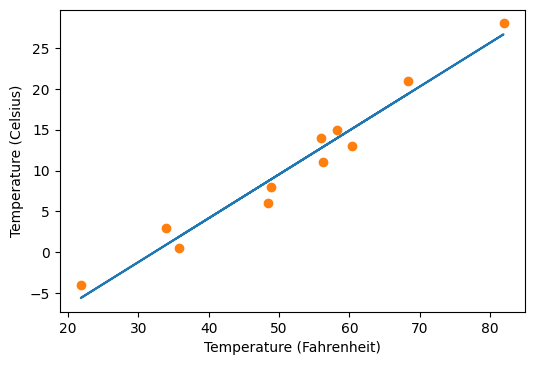

In [91]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi = 100)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [95]:
params = torch.tensor([1.0,0.0], requires_grad =True)
loss = loss_fn(model(t_u,*params),t_c)
loss.backward()
params.grad

tensor([4515.1934,   82.5818])

In [96]:
def training(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1,n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epchs %d, Loss %f' %(epoch, float(loss)))
    return params

In [99]:
training(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad = True),t_u = t_un, t_c = t_c)

Epchs 500, Loss 7.883368
Epchs 1000, Loss 3.846818
Epchs 1500, Loss 3.108604
Epchs 2000, Loss 2.973596
Epchs 2500, Loss 2.948908
Epchs 3000, Loss 2.944392
Epchs 3500, Loss 2.943566
Epchs 4000, Loss 2.943413
Epchs 4500, Loss 2.943386
Epchs 5000, Loss 2.943380


tensor([  5.3696, -17.3096], requires_grad=True)

In [100]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [101]:
params = torch.tensor([1.0, 0.0], requires_grad= True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [102]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 9.5485e-01, -8.2582e-04], requires_grad=True)

In [103]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7760, 0.1064], requires_grad=True)

In [114]:
def training(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1,n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epchs %d, Loss %f' %(epoch, float(loss)))
    return params

In [115]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)
training(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c= t_c)

Epchs 500, Loss 7.883368
Epchs 1000, Loss 3.846818
Epchs 1500, Loss 3.108604
Epchs 2000, Loss 2.973596
Epchs 2500, Loss 2.948908
Epchs 3000, Loss 2.944392
Epchs 3500, Loss 2.943566
Epchs 4000, Loss 2.943413
Epchs 4500, Loss 2.943386
Epchs 5000, Loss 2.943380


tensor([  5.3696, -17.3096], requires_grad=True)

In [118]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr = learning_rate)
training(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c= t_c)

Epchs 500, Loss 24.973150
Epchs 1000, Loss 15.780685
Epchs 1500, Loss 9.480758
Epchs 2000, Loss 5.789683
Epchs 2500, Loss 3.951850
Epchs 3000, Loss 3.213793
Epchs 3500, Loss 2.993207
Epchs 4000, Loss 2.948966
Epchs 4500, Loss 2.943707
Epchs 5000, Loss 2.943390


tensor([  5.3686, -17.3036], requires_grad=True)

In [123]:
n_sample = t_u.shape[0]
n_val = int(0.2 * n_sample)
shuffled_index = torch.randperm(n_sample)
train_index = shuffled_index[:-n_val]
val_index = shuffled_index[-n_val:]
train_index, val_index

(tensor([ 0,  4, 10,  7,  5,  1,  2,  8,  9]), tensor([3, 6]))

In [124]:
train_tu = t_u[train_index]
train_tc = t_c[train_index]

val_tu = t_u[val_index]
val_tc = t_c[val_index]

train_tun = 0.1 * train_tu
val_tun = 0.1 * val_tu

In [132]:
def training(n_epochs, optimizer, params, train_tu, train_tc, val_tu, val_tc):
    for epoch in range(1,n_epochs+1):
        train_tp = model(train_tu, *params)
        train_loss = loss_fn(train_tp, train_tc)
        
        val_tp = model(val_tu, *params)
        val_loss = loss_fn(val_tp, val_tc)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epchs {epoch}, Training Loss {train_loss.item():.4f}'f" Validation loss {val_loss.item():.4f}")
    return params

In [135]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)
training(n_epochs = 5000, optimizer = optimizer, params = params, train_tu = train_tun, train_tc = train_tc, val_tu = val_tun, val_tc = val_tc)

Epchs 1, Training Loss 54.6337 Validation loss 196.2941
Epchs 2, Training Loss 28.9885 Validation loss 113.8421
Epchs 3, Training Loss 24.0437 Validation loss 86.6865
Epchs 500, Training Loss 8.5454 Validation loss 23.6062
Epchs 1000, Training Loss 4.4094 Validation loss 10.2204
Epchs 1500, Training Loss 3.2290 Validation loss 6.3206
Epchs 2000, Training Loss 2.8922 Validation loss 5.1650
Epchs 2500, Training Loss 2.7960 Validation loss 4.8125
Epchs 3000, Training Loss 2.7686 Validation loss 4.6997
Epchs 3500, Training Loss 2.7608 Validation loss 4.6610
Epchs 4000, Training Loss 2.7585 Validation loss 4.6465
Epchs 4500, Training Loss 2.7579 Validation loss 4.6405
Epchs 5000, Training Loss 2.7577 Validation loss 4.6378


tensor([  5.3198, -17.4388], requires_grad=True)

In [136]:
def training(n_epochs, optimizer, params, train_tu, train_tc, val_tu, val_tc):
    for epoch in range(1,n_epochs+1):
        train_tp = model(train_tu, *params)
        train_loss = loss_fn(train_tp, train_tc)
        with torch.no_grad():
            val_tp = model(val_tu, *params)
            val_loss = loss_fn(val_tp, val_tc)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epchs {epoch}, Training Loss {train_loss.item():.4f}'f" Validation loss {val_loss.item():.4f}")
    return params

In [137]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_traing):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss